# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters
#me begin: data frame can imagine as an excel table
#first row:label
#you can also label the columns e.g. with time
#a single column is a series: series is a generalization of a 
#numpy array, they have an index and we can label the index
#e.g. through time
#me: end
# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print(xs[3])
#you can access element of multiiple indeces
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

1.5
<class 'pandas.core.series.Series'> 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)# creating series from dictionary just passing 
#the dictionary to the constructor



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
print(s[:-1])
s = s[1:] + s[:-1]
print(s)

a    0.390600
b    0.406864
c    1.667273
d   -0.916533
e   -0.701823
dtype: float64
a    0.390600
b    0.406864
c    1.667273
d   -0.916533
dtype: float64
a         NaN
b    0.813729
c    3.334546
d   -1.833066
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas as a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2020,11,9,14,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 9 2020'
# or alternatively
date = '9/11/2020 14:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2020-11-16
2020-11-09 14:45:10.000015
9/11/2020 14:45:00
DatetimeIndex(['2020-09-11 14:45:00', '2020-09-12 14:45:00',
               '2020-09-13 14:45:00', '2020-09-14 14:45:00',
               '2020-09-15 14:45:00', '2020-09-16 14:45:00',
               '2020-09-17 14:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2020-09-11 14:45:00', '2020-09-11 14:45:01',
               '2020-09-11 14:45:02', '2020-09-11 14:45:03',
               '2020-09-11 14:45:04', '2020-09-11 14:45:05',
               '2020-09-11 14:45:06', '2020-09-11 14:45:07',
               '2020-09-11 14:45:08', '2020-09-11 14:45:09',
               ...
               '2020-09-11 15:44:50', '2020-09-11 15:44:51',
               '2020-09-11 15:44:52', '2020-09-11 15:44:53',
               '2020-09-11 15:44:54', '2020-09-11 15:44:55',
               '2020-09-11 15:44:56', '2020-09-11 15:44:57',
               '2020-09-11 15:44:58', '2020-09-11 15:44:59'],
              dtype='datetime64[ns]', lengt

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset

In [7]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 1970
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2010-11-12 00:00:00
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [8]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2020-09-11':'2020-09-13'], '\n') # Note - includes end time


2020-09-11 14:45:00     9.344930
2020-09-12 14:45:00    10.052800
2020-09-13 14:45:00    10.676504
2020-09-14 14:45:00    10.476939
Freq: D, dtype: float64 

2020-09-11 14:45:00     9.344930
2020-09-12 14:45:00    10.052800
2020-09-13 14:45:00    10.676504
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [9]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [10]:
entries=10
dates=pd.date_range('11/9/2020 14:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
#we fill up randomly 4 features called A,B,C,D with a np array 10*4
df #nice formatting
#print(df) #worst formatting



,A,B,C,D
2020-11-09 14:45:00,-0.871875,2.436295,0.299589,0.042349
2020-11-09 15:45:00,0.581579,-1.186685,1.543315,0.006379
2020-11-09 16:45:00,-1.323373,-1.542934,-1.606071,-1.863467
2020-11-09 17:45:00,1.806570,-0.733086,0.790091,1.136649
2020-11-09 18:45:00,-0.776455,1.016921,-0.788583,-1.368253
2020-11-09 19:45:00,-0.669145,1.020375,0.203688,-1.464608
2020-11-09 20:45:00,-3.079368,-1.042185,-0.263355,-1.704055
2020-11-09 21:45:00,-0.204729,1.426130,0.350856,0.209011
2020-11-09 22:45:00,-1.302138,-0.287821,1.040909,0.706584
2020-11-09 23:45:00,2.237236,0.281213,1.340607,-1.188673


or by means of a dictionary:


In [11]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
#the keys of the dictionaries are the labels
#what comes after is the column, so e.g. when we have 1. the column 
#labelled with A will be filled with 4 in all its extent
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [12]:
df.head(1)
df.head()

,A,B,C,D
2020-11-09 14:45:00,-0.871875,2.436295,0.299589,0.042349
2020-11-09 15:45:00,0.581579,-1.186685,1.543315,0.006379
2020-11-09 16:45:00,-1.323373,-1.542934,-1.606071,-1.863467
2020-11-09 17:45:00,1.806570,-0.733086,0.790091,1.136649
2020-11-09 18:45:00,-0.776455,1.016921,-0.788583,-1.368253


In [13]:
df.tail(4)

,A,B,C,D
2020-11-09 20:45:00,-3.079368,-1.042185,-0.263355,-1.704055
2020-11-09 21:45:00,-0.204729,1.426130,0.350856,0.209011
2020-11-09 22:45:00,-1.302138,-0.287821,1.040909,0.706584
2020-11-09 23:45:00,2.237236,0.281213,1.340607,-1.188673


In [14]:
df.index

DatetimeIndex(['2020-11-09 14:45:00', '2020-11-09 15:45:00',
               '2020-11-09 16:45:00', '2020-11-09 17:45:00',
               '2020-11-09 18:45:00', '2020-11-09 19:45:00',
               '2020-11-09 20:45:00', '2020-11-09 21:45:00',
               '2020-11-09 22:45:00', '2020-11-09 23:45:00'],
              dtype='datetime64[ns]', freq='H')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.values

array([[-0.87187451,  2.43629542,  0.29958912,  0.04234901],
       [ 0.58157927, -1.18668546,  1.54331502,  0.00637909],
       [-1.32337321, -1.54293382, -1.60607126, -1.86346707],
       [ 1.80656976, -0.73308611,  0.79009082,  1.13664904],
       [-0.77645495,  1.01692069, -0.78858345, -1.36825293],
       [-0.6691451 ,  1.02037459,  0.2036876 , -1.46460785],
       [-3.07936771, -1.04218452, -0.26335488, -1.70405477],
       [-0.20472935,  1.42613017,  0.35085607,  0.20901104],
       [-1.30213801, -0.28782087,  1.04090881,  0.70658394],
       [ 2.23723627,  0.28121306,  1.34060657, -1.18867318]])

In [17]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.360170,0.138822,0.291104,-0.548808
std,1.566739,1.309211,0.975499,1.086855
min,-3.079368,-1.542934,-1.606071,-1.863467
25%,-1.194572,-0.964910,-0.146594,-1.440519
50%,-0.722800,-0.003304,0.325223,-0.591147
75%,0.385002,1.019511,0.978204,0.167346
max,2.237236,2.436295,1.543315,1.136649


In [18]:
df.T

,2020-11-09 14:45:00,2020-11-09 15:45:00,2020-11-09 16:45:00,2020-11-09 17:45:00,2020-11-09 18:45:00,2020-11-09 19:45:00,2020-11-09 20:45:00,2020-11-09 21:45:00,2020-11-09 22:45:00,2020-11-09 23:45:00
A,-0.871875,0.581579,-1.323373,1.806570,-0.776455,-0.669145,-3.079368,-0.204729,-1.302138,2.237236
B,2.436295,-1.186685,-1.542934,-0.733086,1.016921,1.020375,-1.042185,1.426130,-0.287821,0.281213
C,0.299589,1.543315,-1.606071,0.790091,-0.788583,0.203688,-0.263355,0.350856,1.040909,1.340607
D,0.042349,0.006379,-1.863467,1.136649,-1.368253,-1.464608,-1.704055,0.209011,0.706584,-1.188673


In [19]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2020-11-09 14:45:00,0.042349,0.299589,2.436295,-0.871875
2020-11-09 15:45:00,0.006379,1.543315,-1.186685,0.581579
2020-11-09 16:45:00,-1.863467,-1.606071,-1.542934,-1.323373
2020-11-09 17:45:00,1.136649,0.790091,-0.733086,1.806570
2020-11-09 18:45:00,-1.368253,-0.788583,1.016921,-0.776455
2020-11-09 19:45:00,-1.464608,0.203688,1.020375,-0.669145
2020-11-09 20:45:00,-1.704055,-0.263355,-1.042185,-3.079368
2020-11-09 21:45:00,0.209011,0.350856,1.426130,-0.204729
2020-11-09 22:45:00,0.706584,1.040909,-0.287821,-1.302138
2020-11-09 23:45:00,-1.188673,1.340607,0.281213,2.237236


In [20]:
df.sort_values(by="C")
#C is the value we sorted and all the other values got sorted accordingly

,A,B,C,D
2020-11-09 16:45:00,-1.323373,-1.542934,-1.606071,-1.863467
2020-11-09 18:45:00,-0.776455,1.016921,-0.788583,-1.368253
2020-11-09 20:45:00,-3.079368,-1.042185,-0.263355,-1.704055
2020-11-09 19:45:00,-0.669145,1.020375,0.203688,-1.464608
2020-11-09 14:45:00,-0.871875,2.436295,0.299589,0.042349
2020-11-09 21:45:00,-0.204729,1.426130,0.350856,0.209011
2020-11-09 17:45:00,1.806570,-0.733086,0.790091,1.136649
2020-11-09 22:45:00,-1.302138,-0.287821,1.040909,0.706584
2020-11-09 23:45:00,2.237236,0.281213,1.340607,-1.188673
2020-11-09 15:45:00,0.581579,-1.186685,1.543315,0.006379


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [64]:
## standard and safe
print (df[0:3]['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
#it isn't recommended
print (df.A)

2020-11-09 14:45:00    0.000000
2020-11-09 15:45:00    0.581579
2020-11-09 16:45:00   -0.741794
Freq: H, Name: A, dtype: float64 

2020-11-09 14:45:00    0.000000
2020-11-09 15:45:00    0.581579
2020-11-09 16:45:00   -0.741794
2020-11-09 17:45:00    1.064776
2020-11-09 18:45:00    0.288321
2020-11-09 19:45:00   -0.380824
2020-11-09 20:45:00   -3.460192
2020-11-09 21:45:00   -3.664921
2020-11-09 22:45:00   -4.967059
2020-11-09 23:45:00   -2.729823
Freq: H, Name: A, dtype: float64


In [22]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2020-11-09 14:45:00":"2020-11-09 16:45:00"])

                            A         B         C         D
2020-11-09 14:45:00 -0.871875  2.436295  0.299589  0.042349
2020-11-09 15:45:00  0.581579 -1.186685  1.543315  0.006379
2020-11-09 16:45:00 -1.323373 -1.542934 -1.606071 -1.863467
                            A         B         C         D
2020-11-09 14:45:00 -0.871875  2.436295  0.299589  0.042349
2020-11-09 15:45:00  0.581579 -1.186685  1.543315  0.006379
2020-11-09 16:45:00 -1.323373 -1.542934 -1.606071 -1.863467


### Selection by label

In [23]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]
#dates[0] is the forst index
#loc is not really a proper method since it uses [] and not ()

A   -0.871875
B    2.436295
C    0.299589
D    0.042349
Name: 2020-11-09 14:45:00, dtype: float64

In [24]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
a=df.loc[:,['A','B']]
#!!!!!!!!!! cuidado: loc returns a copy, iloc return a view

In [25]:
# showing label slicing, both endpoints are included:
df.loc['2020-11-09 18:45:00':'2020-11-09 20:45:00',['A','B']]

,A,B
2020-11-09 18:45:00,-0.776455,1.016921
2020-11-09 19:45:00,-0.669145,1.020375
2020-11-09 20:45:00,-3.079368,-1.042185


In [65]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])
#mixed selcting: index and label
print (df.loc[df.index[[0, 2]], 'A'])

0.58157927108868
0.58157927108868
                            A         B         C   D     E  E prime    cosine
2020-11-09 14:45:00  0.000000  2.436295  0.299589   5   0.0        0  1.000000
2020-11-09 15:45:00  0.581579  1.249610  1.842904  10   0.5        2  1.999962
2020-11-09 16:45:00 -0.741794 -0.293324  0.236833  15   1.5        6  2.999810
2020-11-09 17:45:00  1.064776 -1.026410  1.026924  20   3.0       12  3.999467
2020-11-09 18:45:00  0.288321 -0.009489  0.238340  25   5.0       20  4.998858
2020-11-09 19:45:00 -0.380824  1.010885  0.442028  30   7.5       30  5.997906
2020-11-09 20:45:00 -3.460192 -0.031299  0.178673  35  10.5       42  6.996536
2020-11-09 21:45:00 -3.664921  1.394831  0.529529  40  14.0       56  7.994670
2020-11-09 22:45:00 -4.967059  1.107010  1.570438  45  18.0       72  8.992234
2020-11-09 23:45:00 -2.729823  1.388223  2.911044  50  22.5       90  9.989152


### Selecting by position

In [66]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])


A           1.064776
B          -1.026410
C           1.026924
D          20.000000
E           3.000000
E prime    12.000000
cosine      3.999467
Name: 2020-11-09 17:45:00, dtype: float64 

                            A         B
2020-11-09 17:45:00  1.064776 -1.026410
2020-11-09 18:45:00  0.288321 -0.009489
                            A         B         C   D     E  E prime    cosine
2020-11-09 14:45:00  0.000000  2.436295  0.299589   5   0.0        0  1.000000
2020-11-09 15:45:00  0.581579  1.249610  1.842904  10   0.5        2  1.999962
2020-11-09 16:45:00 -0.741794 -0.293324  0.236833  15   1.5        6  2.999810
2020-11-09 17:45:00  1.064776 -1.026410  1.026924  20   3.0       12  3.999467
2020-11-09 18:45:00  0.288321 -0.009489  0.238340  25   5.0       20  4.998858
2020-11-09 19:45:00 -0.380824  1.010885  0.442028  30   7.5       30  5.997906
2020-11-09 20:45:00 -3.460192 -0.031299  0.178673  35  10.5       42  6.996536
2020-11-09 21:45:00 -3.664921  1.394831  0.529529  40  14

In [28]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2020-11-09 15:45:00,0.581579,1.543315
2020-11-09 16:45:00,-1.323373,-1.606071
2020-11-09 18:45:00,-0.776455,-0.788583


In [82]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])
#print(df)


                            A         B         C   D    E  E prime    cosine
2020-11-09 15:45:00  0.581579  1.249610  1.842904  10  0.5        2  1.999962
2020-11-09 16:45:00 -0.741794 -0.293324  0.236833  15  1.5        6  2.999810 

                            B         C
2020-11-09 14:45:00  2.436295  0.299589
2020-11-09 15:45:00  1.249610  1.842904
2020-11-09 16:45:00 -0.293324  0.236833
2020-11-09 17:45:00 -1.026410  1.026924
2020-11-09 18:45:00 -0.009489  0.238340
2020-11-09 19:45:00  1.010885  0.442028
2020-11-09 20:45:00 -0.031299  0.178673
2020-11-09 21:45:00  1.394831  0.529529
2020-11-09 22:45:00  1.107010  1.570438
2020-11-09 23:45:00  1.388223  2.911044
2020-11-09 14:45:00    0.000000
2020-11-09 16:45:00   -0.741794
Name: A, dtype: float64


In [30]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


-1.1866854629699404

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [31]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2020-11-09 14:45:00,-0.871875,2.436295,0.299589,0.042349
2020-11-09 18:45:00,-0.776455,1.016921,-0.788583,-1.368253
2020-11-09 19:45:00,-0.669145,1.020375,0.203688,-1.464608
2020-11-09 21:45:00,-0.204729,1.426130,0.350856,0.209011
2020-11-09 23:45:00,2.237236,0.281213,1.340607,-1.188673


In [32]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2020-11-09 14:45:00,NaN,2.436295,0.299589,0.042349
2020-11-09 15:45:00,0.581579,NaN,1.543315,0.006379
2020-11-09 16:45:00,NaN,NaN,NaN,NaN
2020-11-09 17:45:00,1.806570,NaN,0.790091,1.136649
2020-11-09 18:45:00,NaN,1.016921,NaN,NaN
2020-11-09 19:45:00,NaN,1.020375,0.203688,NaN
2020-11-09 20:45:00,NaN,NaN,NaN,NaN
2020-11-09 21:45:00,NaN,1.426130,0.350856,0.209011
2020-11-09 22:45:00,NaN,NaN,1.040909,0.706584
2020-11-09 23:45:00,2.237236,0.281213,1.340607,NaN


### Setting

Combination of selection and setting of values

In [33]:
# setting values by label (same as by position)
df.at[[dates[0]],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [34]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)


#column wise operations
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)

df

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,2.436295,0.299589,5,0.0,0,1.000000
2020-11-09 15:45:00,0.581579,-1.186685,1.543315,5,0.5,2,0.999962
2020-11-09 16:45:00,-1.323373,-1.542934,-1.606071,5,1.0,4,0.999848
2020-11-09 17:45:00,1.806570,-0.733086,0.790091,5,1.5,6,0.999657
2020-11-09 18:45:00,-0.776455,1.016921,-0.788583,5,2.0,8,0.999391
2020-11-09 19:45:00,-0.669145,1.020375,0.203688,5,2.5,10,0.999048
2020-11-09 20:45:00,-3.079368,-1.042185,-0.263355,5,3.0,12,0.998630
2020-11-09 21:45:00,-0.204729,1.426130,0.350856,5,3.5,14,0.998135
2020-11-09 22:45:00,-1.302138,-0.287821,1.040909,5,4.0,16,0.997564
2020-11-09 23:45:00,2.237236,0.281213,1.340607,5,4.5,18,0.996917


In [35]:
# another example of global setting
df2=df.copy()
df2[df2>0] = -df2 #setting negative values for each positive value
df2


,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,-2.436295,-0.299589,-5,0.0,0,-1.000000
2020-11-09 15:45:00,-0.581579,-1.186685,-1.543315,-5,-0.5,-2,-0.999962
2020-11-09 16:45:00,-1.323373,-1.542934,-1.606071,-5,-1.0,-4,-0.999848
2020-11-09 17:45:00,-1.806570,-0.733086,-0.790091,-5,-1.5,-6,-0.999657
2020-11-09 18:45:00,-0.776455,-1.016921,-0.788583,-5,-2.0,-8,-0.999391
2020-11-09 19:45:00,-0.669145,-1.020375,-0.203688,-5,-2.5,-10,-0.999048
2020-11-09 20:45:00,-3.079368,-1.042185,-0.263355,-5,-3.0,-12,-0.998630
2020-11-09 21:45:00,-0.204729,-1.426130,-0.350856,-5,-3.5,-14,-0.998135
2020-11-09 22:45:00,-1.302138,-0.287821,-1.040909,-5,-4.0,-16,-0.997564
2020-11-09 23:45:00,-2.237236,-0.281213,-1.340607,-5,-4.5,-18,-0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [36]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to

df.drop(columns=['E prime'])
#drop is just a copy not a view
#df

,A,B,C,D,E,cosine
2020-11-09 14:45:00,0.000000,2.436295,0.299589,5,0.0,1.000000
2020-11-09 15:45:00,0.581579,-1.186685,1.543315,5,0.5,0.999962
2020-11-09 16:45:00,-1.323373,-1.542934,-1.606071,5,1.0,0.999848
2020-11-09 17:45:00,1.806570,-0.733086,0.790091,5,1.5,0.999657
2020-11-09 18:45:00,-0.776455,1.016921,-0.788583,5,2.0,0.999391
2020-11-09 19:45:00,-0.669145,1.020375,0.203688,5,2.5,0.999048
2020-11-09 20:45:00,-3.079368,-1.042185,-0.263355,5,3.0,0.998630
2020-11-09 21:45:00,-0.204729,1.426130,0.350856,5,3.5,0.998135
2020-11-09 22:45:00,-1.302138,-0.287821,1.040909,5,4.0,0.997564
2020-11-09 23:45:00,2.237236,0.281213,1.340607,5,4.5,0.996917


In [37]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,2.436295,0.299589,5,0.0,0,1.000000
2020-11-09 19:45:00,-0.669145,1.020375,0.203688,5,2.5,10,0.999048
2020-11-09 20:45:00,-3.079368,-1.042185,-0.263355,5,3.0,12,0.998630
2020-11-09 21:45:00,-0.204729,1.426130,0.350856,5,3.5,14,0.998135
2020-11-09 22:45:00,-1.302138,-0.287821,1.040909,5,4.0,16,0.997564
2020-11-09 23:45:00,2.237236,0.281213,1.340607,5,4.5,18,0.996917


In [38]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2020-11-09 22:45:00"))

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,2.436295,0.299589,5,0.0,0,1.000000
2020-11-09 15:45:00,0.581579,-1.186685,1.543315,5,0.5,2,0.999962
2020-11-09 16:45:00,-1.323373,-1.542934,-1.606071,5,1.0,4,0.999848
2020-11-09 17:45:00,1.806570,-0.733086,0.790091,5,1.5,6,0.999657
2020-11-09 18:45:00,-0.776455,1.016921,-0.788583,5,2.0,8,0.999391
2020-11-09 19:45:00,-0.669145,1.020375,0.203688,5,2.5,10,0.999048
2020-11-09 20:45:00,-3.079368,-1.042185,-0.263355,5,3.0,12,0.998630
2020-11-09 21:45:00,-0.204729,1.426130,0.350856,5,3.5,14,0.998135
2020-11-09 23:45:00,2.237236,0.281213,1.340607,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [39]:
df_wNan = df[df>0]
#selecting values >0, we will have NaN 
#everytime the condition is false
#it's NaN in the sens that is void
#NaN is floating point representation saturating exp mantissa and sign
df_wNan

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,NaN,2.436295,0.299589,5,NaN,NaN,1.000000
2020-11-09 15:45:00,0.581579,NaN,1.543315,5,0.5,2.0,0.999962
2020-11-09 16:45:00,NaN,NaN,NaN,5,1.0,4.0,0.999848
2020-11-09 17:45:00,1.806570,NaN,0.790091,5,1.5,6.0,0.999657
2020-11-09 18:45:00,NaN,1.016921,NaN,5,2.0,8.0,0.999391
2020-11-09 19:45:00,NaN,1.020375,0.203688,5,2.5,10.0,0.999048
2020-11-09 20:45:00,NaN,NaN,NaN,5,3.0,12.0,0.998630
2020-11-09 21:45:00,NaN,1.426130,0.350856,5,3.5,14.0,0.998135
2020-11-09 22:45:00,NaN,NaN,1.040909,5,4.0,16.0,0.997564
2020-11-09 23:45:00,2.237236,0.281213,1.340607,5,4.5,18.0,0.996917


In [40]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2020-11-09 23:45:00,2.237236,0.281213,1.340607,5,4.5,18.0,0.996917


In [41]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,True,False,False,False,True,True,False
2020-11-09 15:45:00,False,True,False,False,False,False,False
2020-11-09 16:45:00,True,True,True,False,False,False,False
2020-11-09 17:45:00,False,True,False,False,False,False,False
2020-11-09 18:45:00,True,False,True,False,False,False,False
2020-11-09 19:45:00,True,False,False,False,False,False,False
2020-11-09 20:45:00,True,True,True,False,False,False,False
2020-11-09 21:45:00,True,False,False,False,False,False,False
2020-11-09 22:45:00,True,True,False,False,False,False,False
2020-11-09 23:45:00,False,False,False,False,False,False,False


In [42]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,2.436295,0.299589,5,0.0,0.0,1.000000
2020-11-09 15:45:00,0.581579,0.000000,1.543315,5,0.5,2.0,0.999962
2020-11-09 16:45:00,0.000000,0.000000,0.000000,5,1.0,4.0,0.999848
2020-11-09 17:45:00,1.806570,0.000000,0.790091,5,1.5,6.0,0.999657
2020-11-09 18:45:00,0.000000,1.016921,0.000000,5,2.0,8.0,0.999391
2020-11-09 19:45:00,0.000000,1.020375,0.203688,5,2.5,10.0,0.999048
2020-11-09 20:45:00,0.000000,0.000000,0.000000,5,3.0,12.0,0.998630
2020-11-09 21:45:00,0.000000,1.426130,0.350856,5,3.5,14.0,0.998135
2020-11-09 22:45:00,0.000000,0.000000,1.040909,5,4.0,16.0,0.997564
2020-11-09 23:45:00,2.237236,0.281213,1.340607,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [43]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,NaN,2.436295,0.299589,5,NaN,NaN,1.000000
2020-11-09 15:45:00,0.581579,2.436295,1.543315,5,0.5,2.0,0.999962
2020-11-09 16:45:00,0.581579,2.436295,1.543315,5,1.0,4.0,0.999848
2020-11-09 17:45:00,1.806570,2.436295,0.790091,5,1.5,6.0,0.999657
2020-11-09 18:45:00,1.806570,1.016921,0.790091,5,2.0,8.0,0.999391
2020-11-09 19:45:00,1.806570,1.020375,0.203688,5,2.5,10.0,0.999048
2020-11-09 20:45:00,1.806570,1.020375,0.203688,5,3.0,12.0,0.998630
2020-11-09 21:45:00,1.806570,1.426130,0.350856,5,3.5,14.0,0.998135
2020-11-09 22:45:00,1.806570,1.426130,1.040909,5,4.0,16.0,0.997564
2020-11-09 23:45:00,2.237236,0.281213,1.340607,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [44]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A         -0.272982
B          0.138822
C          0.291104
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2020-11-09 14:45:00    1.247984
2020-11-09 15:45:00    1.348310
2020-11-09 16:45:00    0.932496
2020-11-09 17:45:00    2.194747
2020-11-09 18:45:00    2.207325
2020-11-09 19:45:00    2.721995
2020-11-09 20:45:00    2.373389
2020-11-09 21:45:00    3.581485
2020-11-09 22:45:00    3.635502
2020-11-09 23:45:00    4.622282
Freq: H, dtype: float64 



In [45]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,2.436295,0.299589,5,0.0,0,1.000000
2020-11-09 15:45:00,0.581579,1.249610,1.842904,10,0.5,2,1.999962
2020-11-09 16:45:00,-0.741794,-0.293324,0.236833,15,1.5,6,2.999810
2020-11-09 17:45:00,1.064776,-1.026410,1.026924,20,3.0,12,3.999467
2020-11-09 18:45:00,0.288321,-0.009489,0.238340,25,5.0,20,4.998858
2020-11-09 19:45:00,-0.380824,1.010885,0.442028,30,7.5,30,5.997906
2020-11-09 20:45:00,-3.460192,-0.031299,0.178673,35,10.5,42,6.996536
2020-11-09 21:45:00,-3.664921,1.394831,0.529529,40,14.0,56,7.994670
2020-11-09 22:45:00,-4.967059,1.107010,1.570438,45,18.0,72,8.992234
2020-11-09 23:45:00,-2.729823,1.388223,2.911044,50,22.5,90,9.989152


In [46]:
df

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,2.436295,0.299589,5,0.0,0,1.000000
2020-11-09 15:45:00,0.581579,-1.186685,1.543315,5,0.5,2,0.999962
2020-11-09 16:45:00,-1.323373,-1.542934,-1.606071,5,1.0,4,0.999848
2020-11-09 17:45:00,1.806570,-0.733086,0.790091,5,1.5,6,0.999657
2020-11-09 18:45:00,-0.776455,1.016921,-0.788583,5,2.0,8,0.999391
2020-11-09 19:45:00,-0.669145,1.020375,0.203688,5,2.5,10,0.999048
2020-11-09 20:45:00,-3.079368,-1.042185,-0.263355,5,3.0,12,0.998630
2020-11-09 21:45:00,-0.204729,1.426130,0.350856,5,3.5,14,0.998135
2020-11-09 22:45:00,-1.302138,-0.287821,1.040909,5,4.0,16,0.997564
2020-11-09 23:45:00,2.237236,0.281213,1.340607,5,4.5,18,0.996917


In [47]:
df.apply(lambda x: x.max() - x.min())

A           5.316604
B           3.979229
C           3.149386
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [48]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2020-11-09 14:45:00    2.436295
2020-11-09 15:45:00   -0.605106
2020-11-09 16:45:00   -2.866307
2020-11-09 17:45:00    1.073484
2020-11-09 18:45:00    0.240466
2020-11-09 19:45:00    0.351229
2020-11-09 20:45:00   -4.121552
2020-11-09 21:45:00    1.221401
2020-11-09 22:45:00   -1.589959
2020-11-09 23:45:00    2.518449
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [49]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [50]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [51]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [52]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-0.473957,-0.753384,-0.605255,-1.022070
1,0.191301,0.154309,-1.195343,1.110923
2,0.697439,-0.717094,0.152094,-0.608853
3,1.447735,1.080890,-0.192153,0.438755
4,0.615767,1.154662,-0.518815,-0.269665
5,1.437268,0.302625,-1.987875,0.090404
6,1.053541,0.311878,-0.672147,0.682583
7,0.600977,0.582851,1.009625,0.122980
8,0.363260,-0.289820,1.990229,-0.733059
9,-0.342451,-0.867203,0.258858,-0.604315


In [53]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0 -0.473957 -0.753384 -0.605255 -1.022070
 1  0.191301  0.154309 -1.195343  1.110923
 2  0.697439 -0.717094  0.152094 -0.608853,
           0         1         2         3
 3  1.447735  1.080890 -0.192153  0.438755
 4  0.615767  1.154662 -0.518815 -0.269665
 5  1.437268  0.302625 -1.987875  0.090404
 6  1.053541  0.311878 -0.672147  0.682583,
           0         1         2         3
 7  0.600977  0.582851  1.009625  0.122980
 8  0.363260 -0.289820  1.990229 -0.733059
 9 -0.342451 -0.867203  0.258858 -0.604315]

In [54]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,-0.473957,-0.753384,-0.605255,-1.022070
1,0.191301,0.154309,-1.195343,1.110923
2,0.697439,-0.717094,0.152094,-0.608853
3,1.447735,1.080890,-0.192153,0.438755
4,0.615767,1.154662,-0.518815,-0.269665
5,1.437268,0.302625,-1.987875,0.090404
6,1.053541,0.311878,-0.672147,0.682583
7,0.600977,0.582851,1.009625,0.122980
8,0.363260,-0.289820,1.990229,-0.733059
9,-0.342451,-0.867203,0.258858,-0.604315


In [55]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

,0,1,2,3
0,-0.473957,-0.753384,-0.605255,-1.022070
1,0.191301,0.154309,-1.195343,1.110923
2,0.697439,-0.717094,0.152094,-0.608853
3,1.447735,1.080890,-0.192153,0.438755
4,0.615767,1.154662,-0.518815,-0.269665
5,1.437268,0.302625,-1.987875,0.090404
6,1.053541,0.311878,-0.672147,0.682583
7,0.600977,0.582851,1.009625,0.122980
8,0.363260,-0.289820,1.990229,-0.733059
9,-0.342451,-0.867203,0.258858,-0.604315


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [56]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [57]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,-0.854903,2.838540
1,bar,one,0.817233,-1.247862
2,foo,two,-1.454341,1.057641
3,bar,three,-0.234927,-1.338851
4,foo,two,-0.077932,-0.143628
5,bar,two,-0.680937,-1.097930
6,foo,one,-0.306479,0.368939
7,foo,three,1.781334,-1.127312


In [58]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,-0.098631,-3.684643
foo,-0.912322,2.994179


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [59]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one      -0.612823
       two       0.112672
baz    one       1.330973
       two       1.293518
foo    one      -1.041319
       two      -1.088501
qux    one      -0.360653
       two       1.718523
dtype: float64


In [60]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.817233 -1.247862
    three -0.234927 -1.338851
    two   -0.680937 -1.097930
foo one   -1.161382  3.207479
    three  1.781334 -1.127312
    two   -1.532274  0.914013

In [61]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C    0.817233
            D   -1.247862
     three  C   -0.234927
            D   -1.338851
     two    C   -0.680937
            D   -1.097930
foo  one    C   -1.161382
            D    3.207479
     three  C    1.781334
            D   -1.127312
     two    C   -1.532274
            D    0.914013
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<AxesSubplot:>

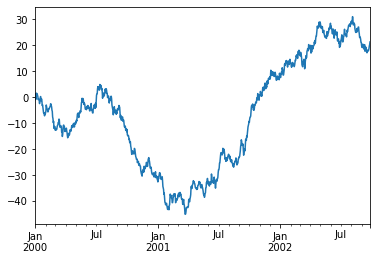

In [62]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

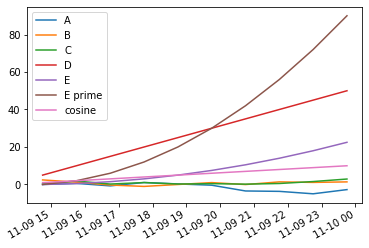

In [63]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')
